<a href="https://colab.research.google.com/github/Deepikha21/CodeAlpha_EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print("Shape",df.shape)
df.info()
df.describe()
df.isnull().sum()

Shape (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


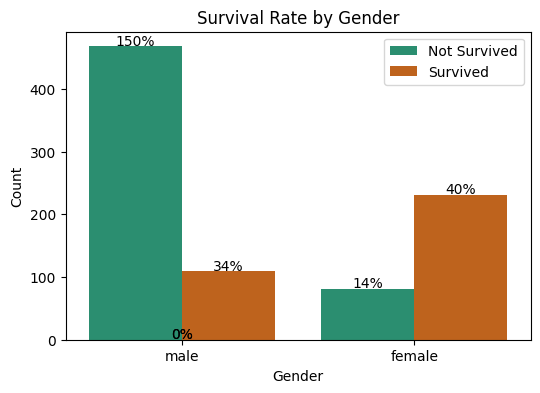

In [35]:
if "Cabin" in df.columns:
  df.drop("Cabin",axis=1,inplace=True)
df.dropna(subset=["Embarked"],inplace=True)
df["Age"]=df["Age"].fillna(df["Age"].median())
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette='Dark2')
total_f = df[df['Sex'] == 'female'].shape[0]
total_m = df[df['Sex'] == 'male'].shape[0]
for p in ax.patches:
    height = p.get_height()
    total = total_f if p.get_x() < 0.5 else total_m
    ax.text(p.get_x() + p.get_width()/2., height + 2, f'{int(height/total*100)}%', ha="center")
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

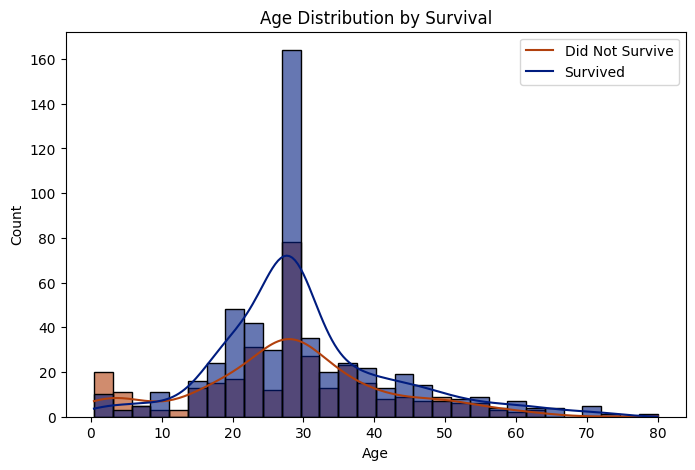

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='dark', alpha=0.6)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

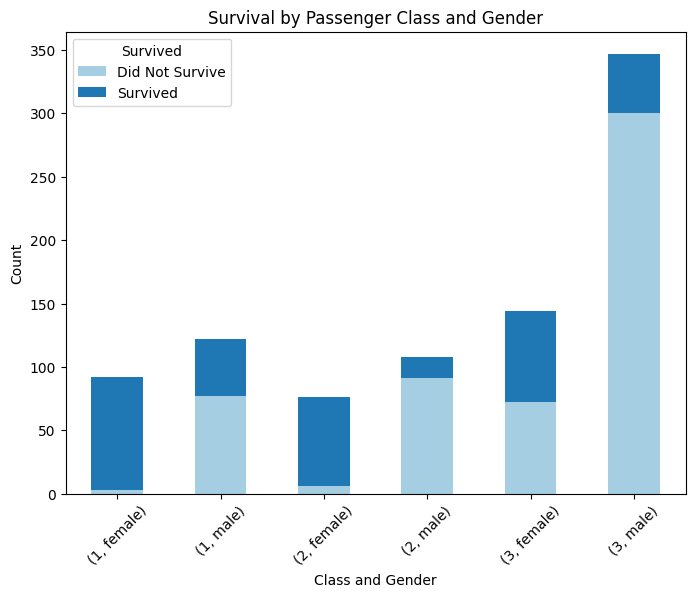

In [43]:
pivot = df.pivot_table(index=['Pclass', 'Sex'], columns='Survived', aggfunc='size', fill_value=0)
colors=sns.color_palette("Paired")
pivot.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))
plt.title('Survival by Passenger Class and Gender')
plt.ylabel('Count')
plt.xlabel('Class and Gender')
plt.legend(['Did Not Survive', 'Survived'], title='Survived')
plt.xticks(rotation=45)
plt.show()